In [2]:
import pandas as pd
train_data = pd.read_csv('D:/Roger Quintiliano/Downloads/train_tratado.csv')
test_data = pd.read_csv('D:/Roger Quintiliano/Downloads/test.csv')

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados de treinamento

# Selecionar as features e o alvo (target)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
y_train = train_data['Survived']

# Treinar o modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [6]:
# Fazer previsões no conjunto de treinamento
predictions_train = model.predict(X_train)

# Adicionar as previsões ao DataFrame de treinamento
train_data['Survived_Predicted'] = predictions_train

# Comparar as previsões com os valores reais
comparison = train_data[['Survived', 'Survived_Predicted']]
print(comparison.head(10))


   Survived  Survived_Predicted
0         0                   0
1         1                   1
2         1                   1
3         1                   1
4         0                   0
5         0                   0
6         0                   0
7         0                   0
8         1                   1
9         1                   1


In [8]:
from sklearn.metrics import accuracy_score, classification_report

#Acurácia
accuracy = accuracy_score(y_train, predictions_train)
print(f"Acurácia: {accuracy}")

#Relatório detalhado de métricas
print(classification_report(y_train,predictions_train))

Acurácia: 0.8159371492704826
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       549
           1       0.80      0.69      0.74       342

    accuracy                           0.82       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



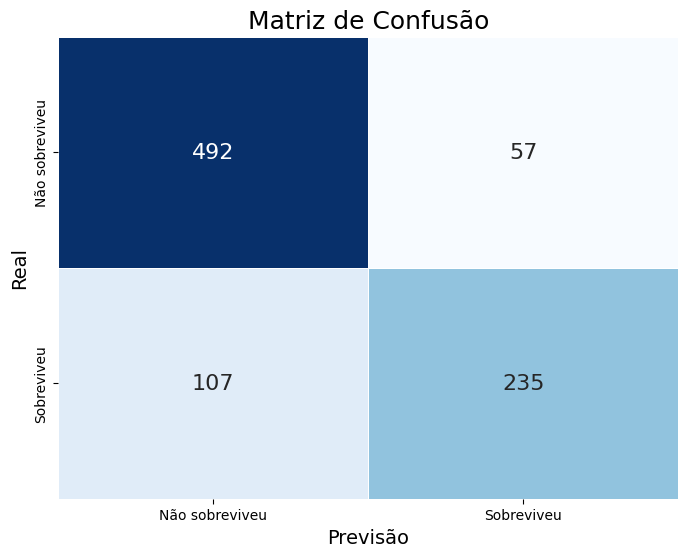

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, predictions_train)

matrix_df = pd.DataFrame(matrix, 
                         index=['Não sobreviveu', 'Sobreviveu'],
                         columns=['Não sobreviveu', 'Sobreviveu'])

plt.figure(figsize=(8,6))
sns.heatmap(matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size":16}, linewidths=0.5)
plt.title('Matriz de Confusão', fontsize=18)
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real',fontsize=14)
plt.show()

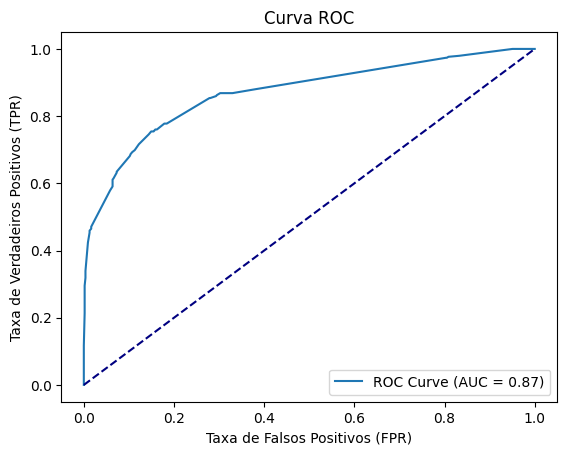

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc = roc_auc_score(y_train, y_probs)


# Plotando a Curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
